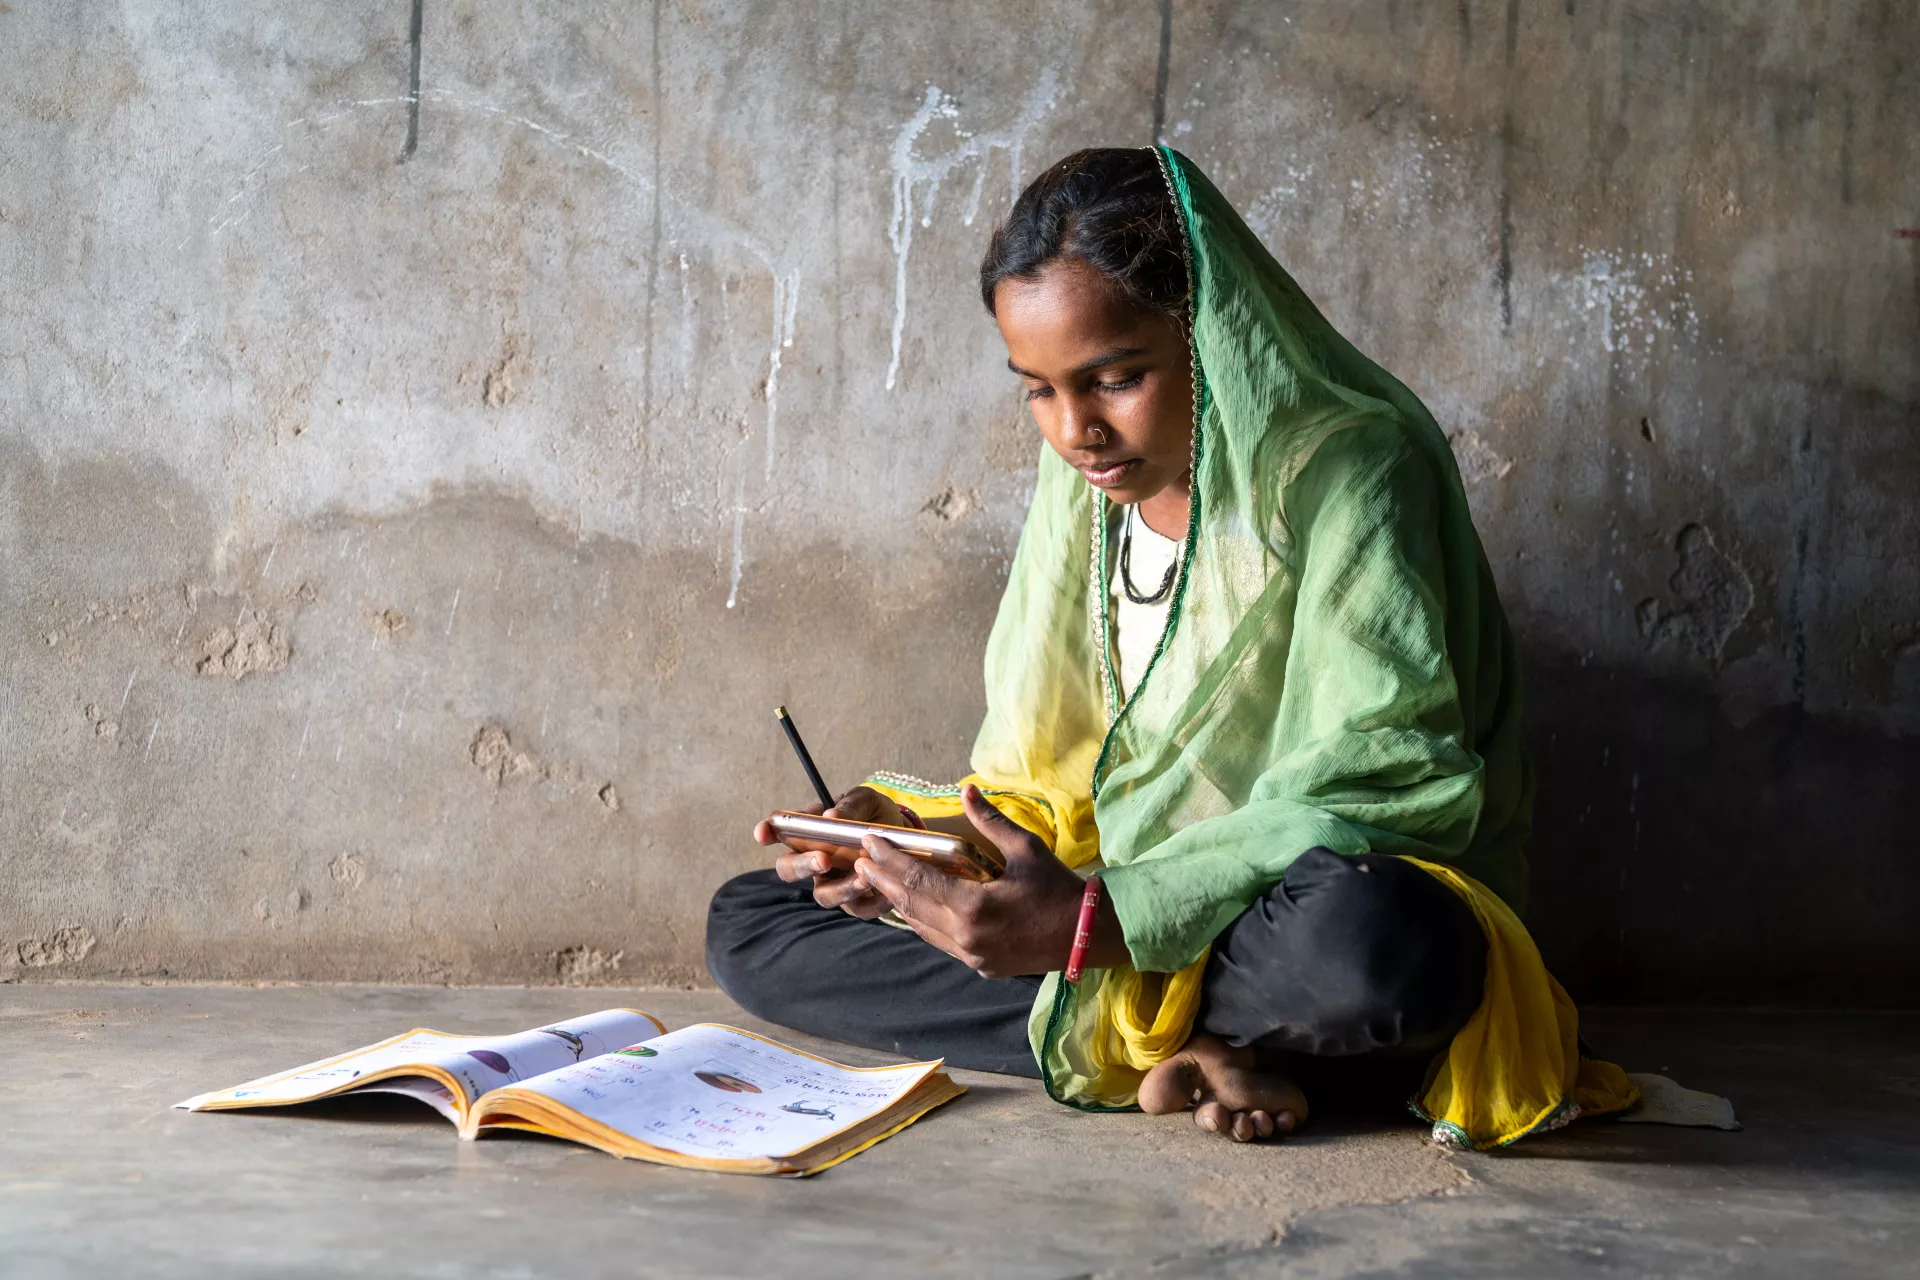
# Global Literacy Analysis

This report explores global literacy patterns, gender disparities, and methodology trends using recent data. The analysis features interactive visuals and concise insights to highlight both global progress and remaining challenges.

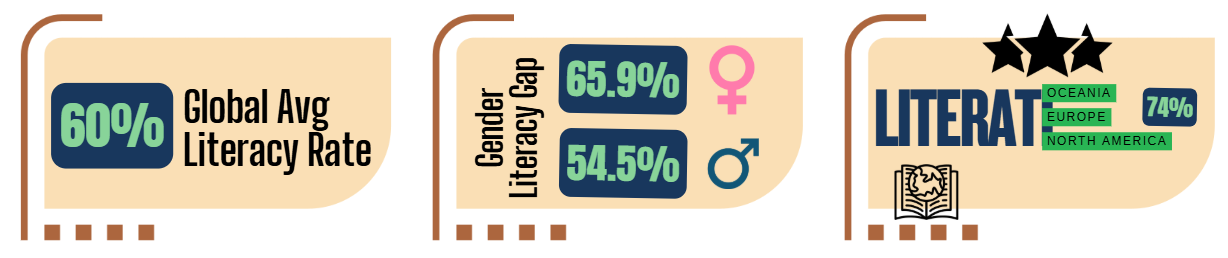


In [ ]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import plotly.express as px

indicator1 = pd.read_csv('/Indicator1_Quarto.csv')
metadata = pd.read_csv('/Metadata_Quarto.csv')
literacydata = pd.read_csv('/LiteracyData_Quarto.csv')
estimate = pd.read_csv('/Literacy Estimation_Quarto.csv')

In [ ]:
# Prepare data for 2018
indicator1_2018 = indicator1[indicator1['time_period'] == 2018]
indicator1_2018 = indicator1_2018.rename(columns={'obs_value': 'Literacy Rate'})
indicator_meta = indicator1_2018.merge(metadata, how='left', on='country')

# World map plot (using plotly)
fig = px.choropleth(
    indicator_meta,
    locations='alpha_3_code_x',
    color='Literacy Rate',
    hover_name='country',
    hover_data={'country': True, 'Literacy Rate': True, 'alpha_3_code_x': False},
    color_continuous_scale='Oranges'
)
fig.update_layout(title_text='<b>World Map: Literacy Rate</b>')
fig.show()

**Insight:**  
This world map highlights significant global variation in literacy rates, with advanced economies and parts of Latin America exhibiting high rates, while much of Sub-Saharan Africa and South Asia lag behind.

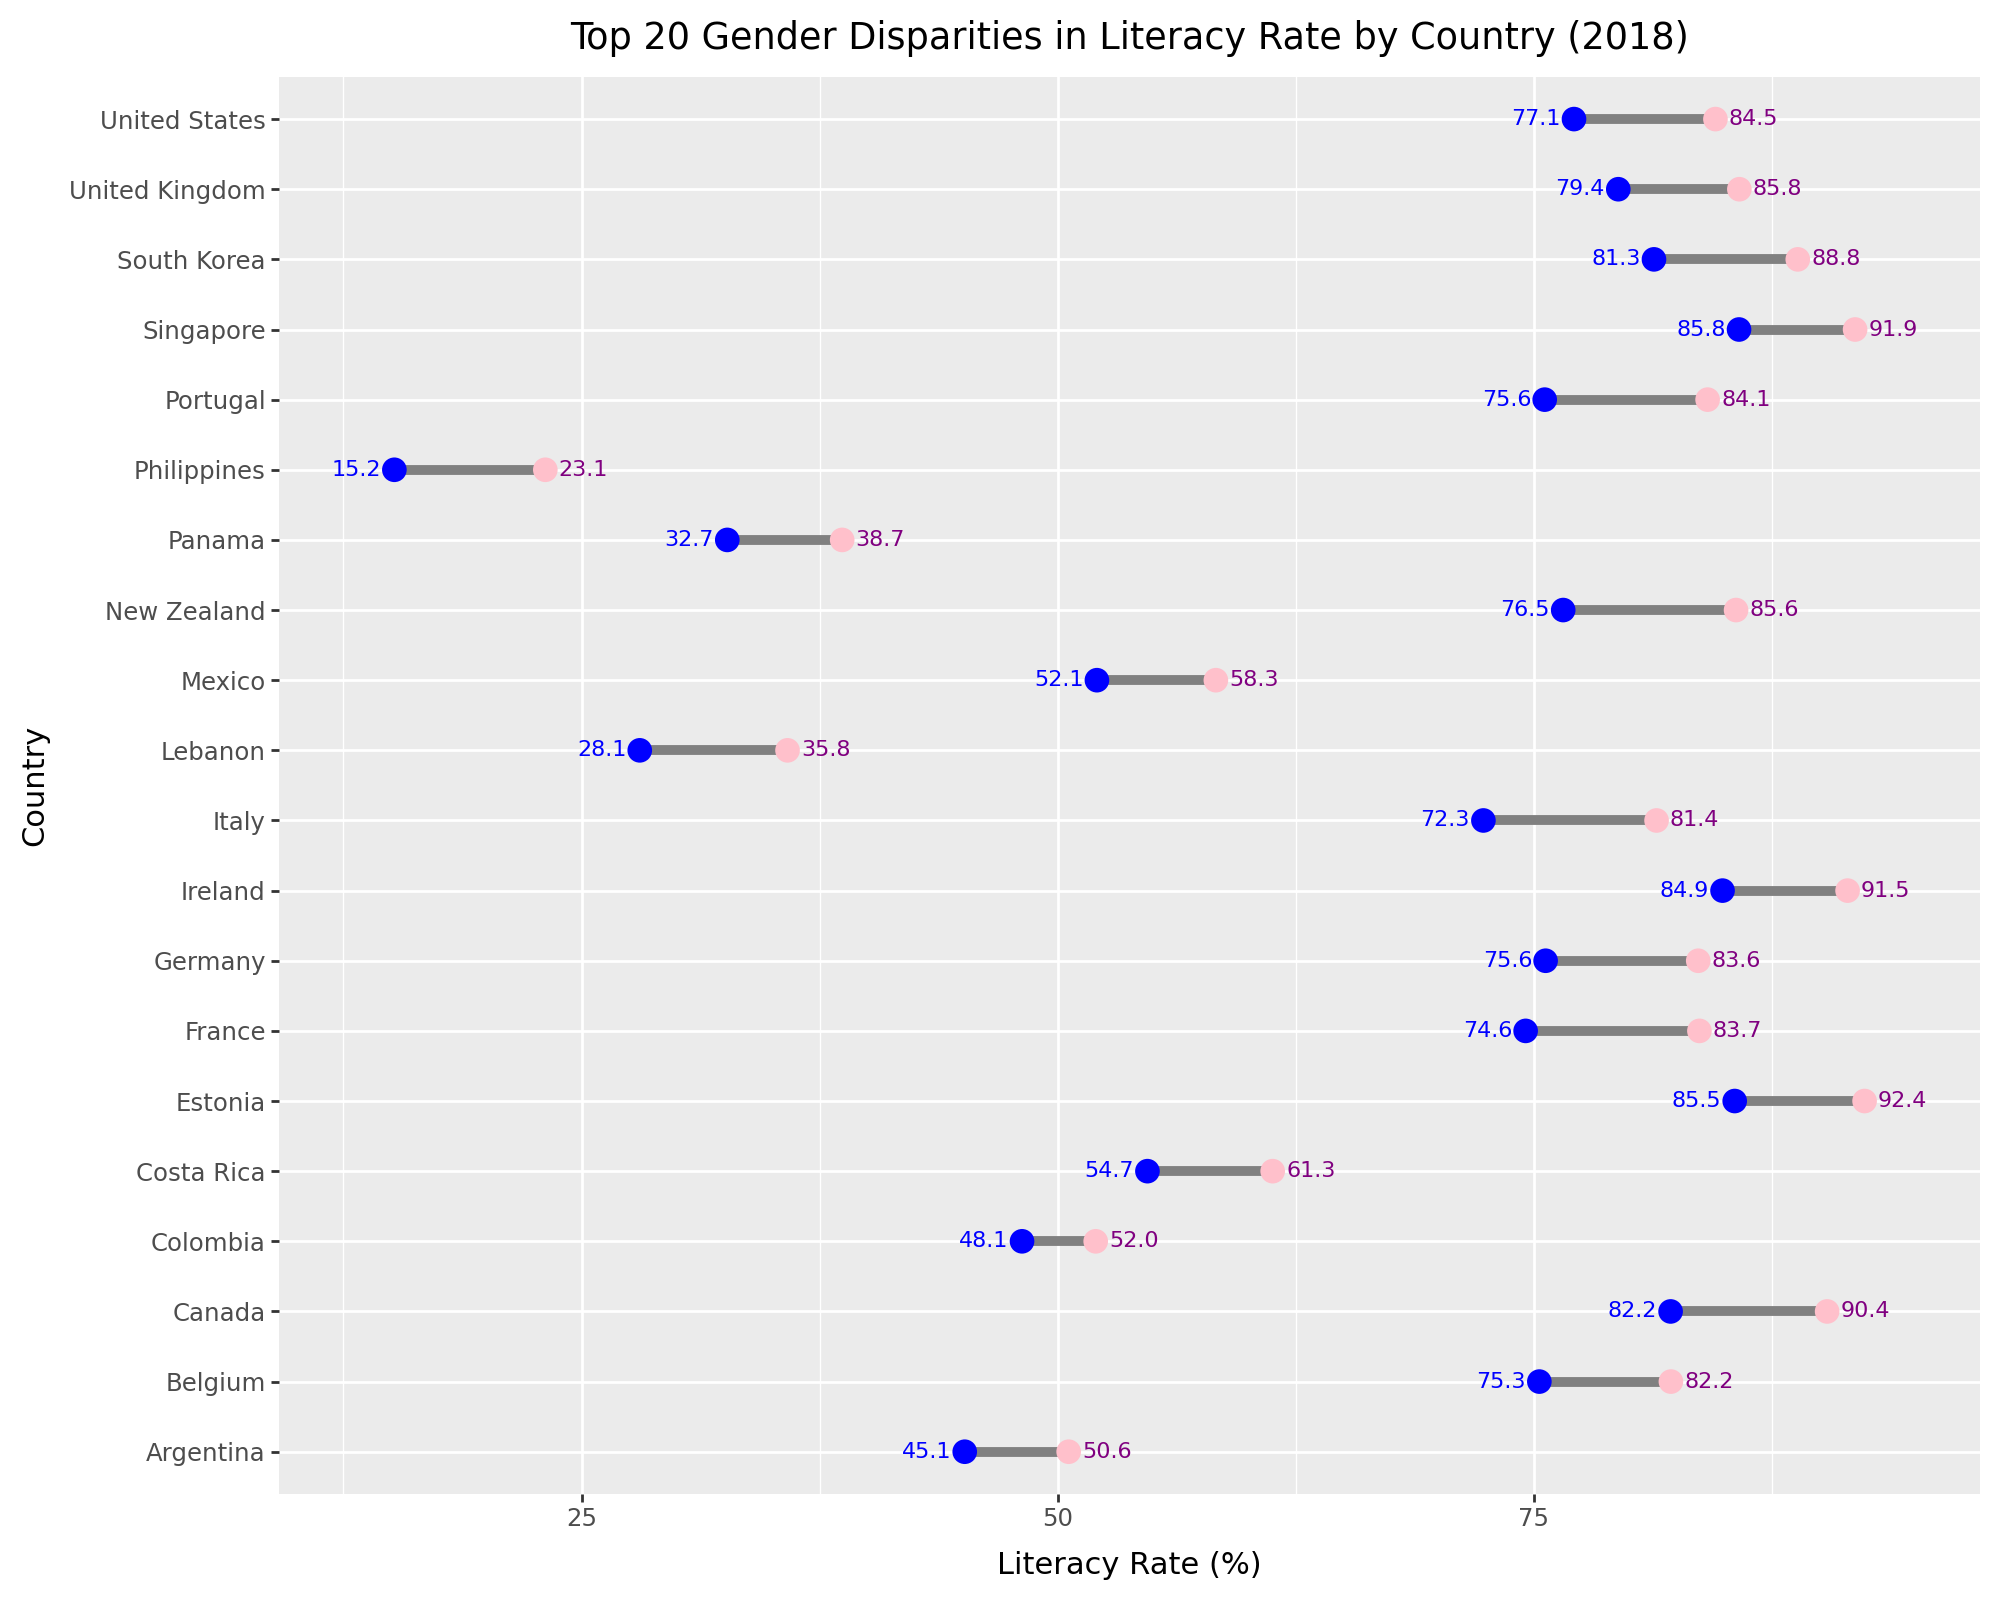

In [ ]:
df_2018 = indicator1[indicator1['time_period'] == 2018][['country', 'obs_value', 'sex']]
df_pivot = df_2018.pivot(index='country', columns='sex', values='obs_value').reset_index()
df_pivot['Gap'] = df_pivot['Male'] - df_pivot['Female']
df_pivot = df_pivot.dropna()
gap_df_plot = df_pivot.sort_values('Gap', ascending=False).head(20)
gap_df_plot['Male_label'] = gap_df_plot['Male'].round(1).astype(str)
gap_df_plot['Female_label'] = gap_df_plot['Female'].round(1).astype(str)

(
    ggplot(gap_df_plot, aes(y='country'))
    + geom_segment(aes(x='Female', xend='Male', yend='country'), color='gray', size=2)
    + geom_point(aes(x='Male'), color='blue', size=4)
    + geom_point(aes(x='Female'), color='pink', size=4)
    + geom_text(aes(x='Male', label='Male_label'), nudge_x=-2, size=8, va='center', color='blue', show_legend=False)
    + geom_text(aes(x='Female', label='Female_label'), nudge_x=2, size=8, va='center', color='purple', show_legend=False)
    + labs(
        title='Top 20 Gender Disparities in Literacy Rate by Country (2018)',
        x='Literacy Rate (%)',
        y='Country'
    )
    + theme(figure_size=(10, 8))
)

**Insight:**  
This world map highlights significant global variation in literacy rates, with advanced economies and parts of Latin America exhibiting high rates, while much of Sub-Saharan Africa and South Asia lag behind.

In [ ]:
data_2018 = indicator_meta[indicator_meta['year'] == 2018]
top10_2018 = data_2018.nlargest(10, 'Literacy Rate')
bottom10_2018 = data_2018.nsmallest(10, 'Literacy Rate')
bar_data_2018 = pd.concat([top10_2018, bottom10_2018])
bar_data_2018 = bar_data_2018.sort_values('Literacy Rate')

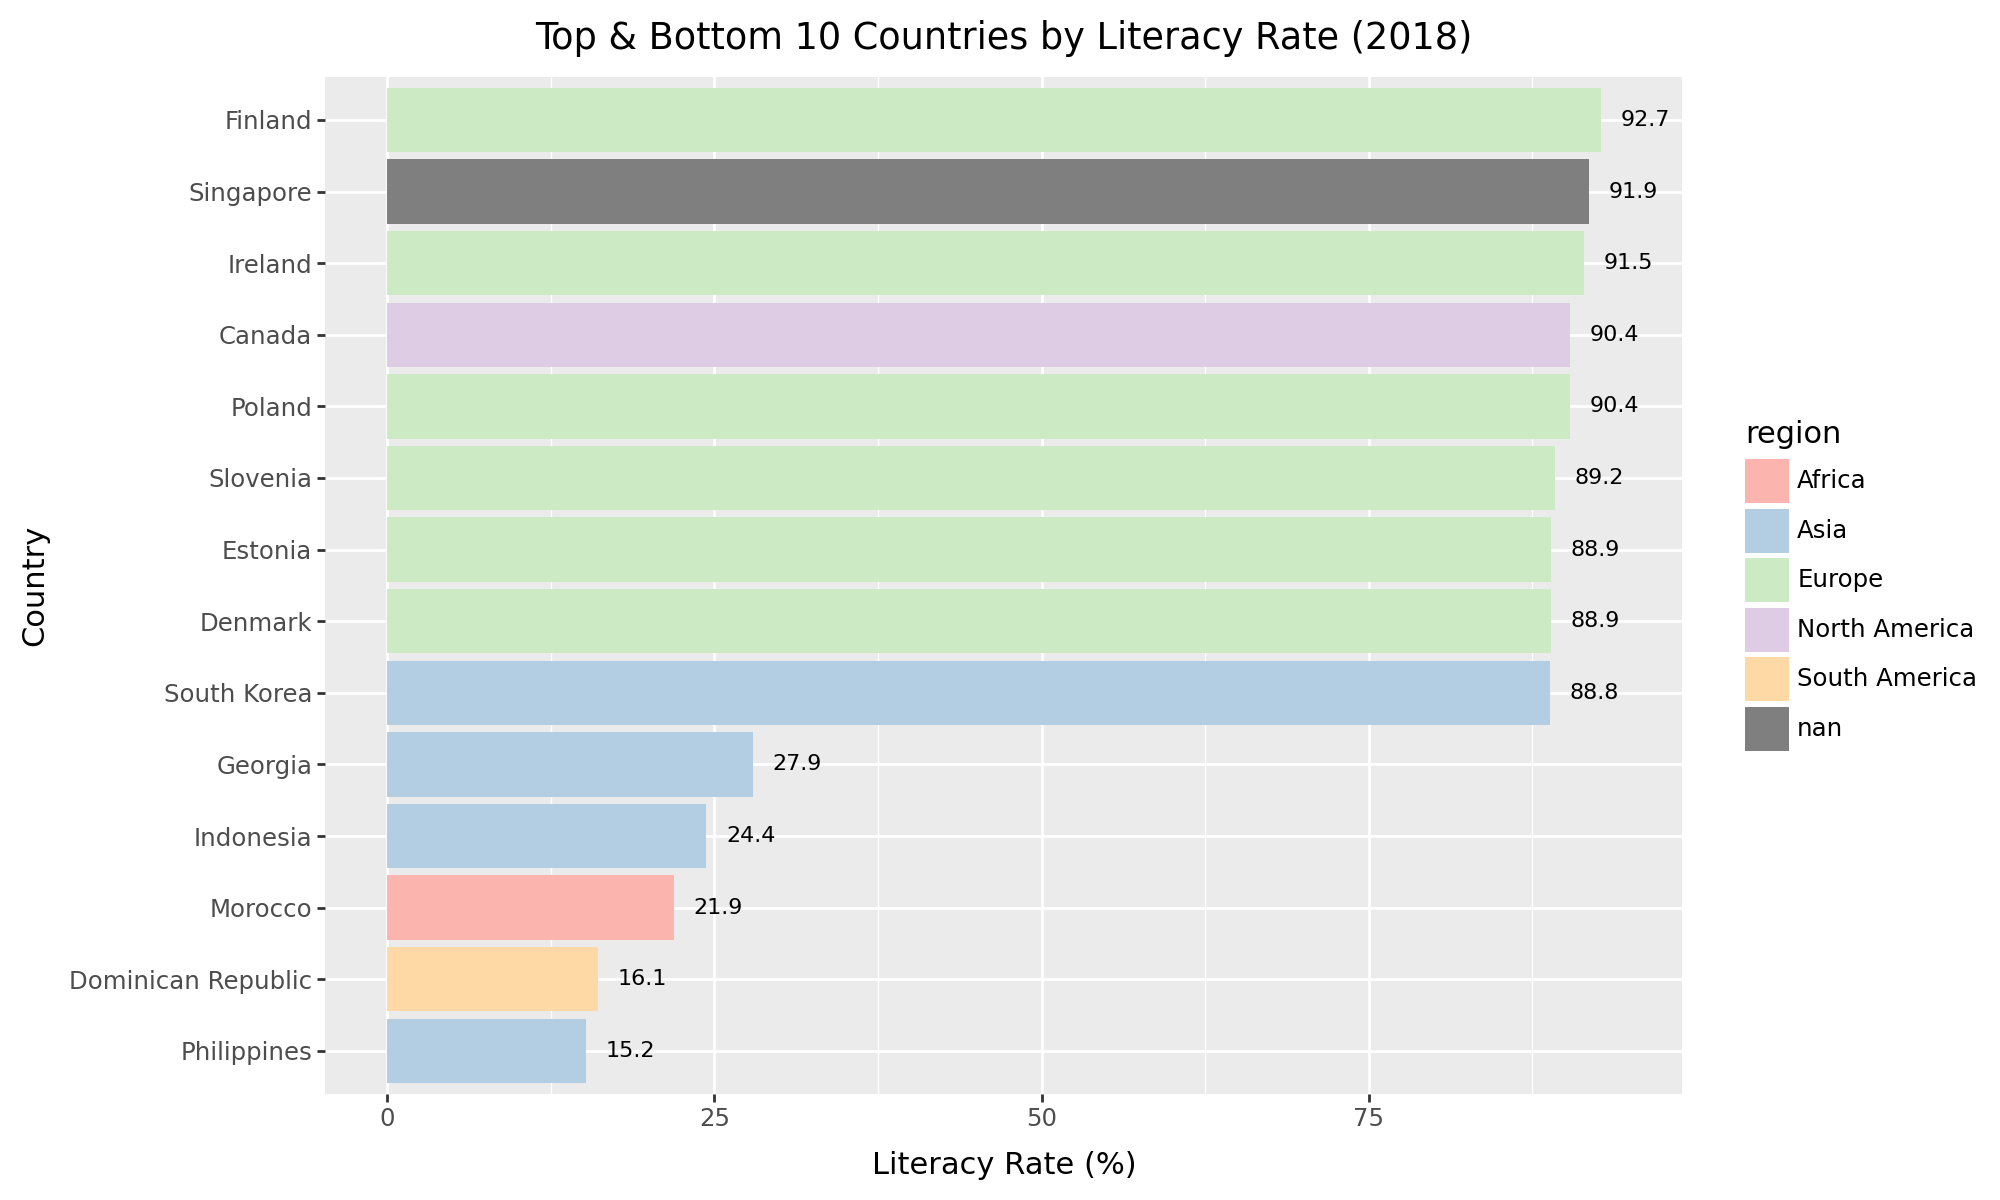

In [ ]:
# Get top and bottom 10
top10 = indicator_meta.nlargest(10, 'Literacy Rate')
bottom10 = indicator_meta.nsmallest(10, 'Literacy Rate')
bar_data = pd.concat([top10, bottom10])
bar_data_2018 = bar_data_2018.drop_duplicates(subset=['country'])
bar_data_2018 = bar_data_2018.sort_values('Literacy Rate')
bar_data_2018['country'] = pd.Categorical(bar_data_2018['country'], categories=bar_data_2018['country'], ordered=True)

from plotnine import *

(
    ggplot(bar_data_2018, aes(x='country', y='Literacy Rate', fill='region'))
    + geom_bar(stat='identity')
    + geom_text(
        aes(label=round(bar_data_2018['Literacy Rate'], 1)),   # Rounded to 1 decimal
        ha='left', va='center',
        nudge_y=1.5,              # Move label slightly to the right; tweak if necessary
        size=8                    # Adjust size for readability (default unit is points)
    )
    + coord_flip()
    + labs(
        title='Top & Bottom 10 Countries by Literacy Rate (2018)',
        x='Country',
        y='Literacy Rate (%)'
    )
    + scale_fill_brewer(type='qual', palette='Pastel1')
    + theme(figure_size=(10, 6))
)

**Insight:**  
The bar chart reveals which countries are leading and lagging in literacy, further emphasizing the divide between regions.

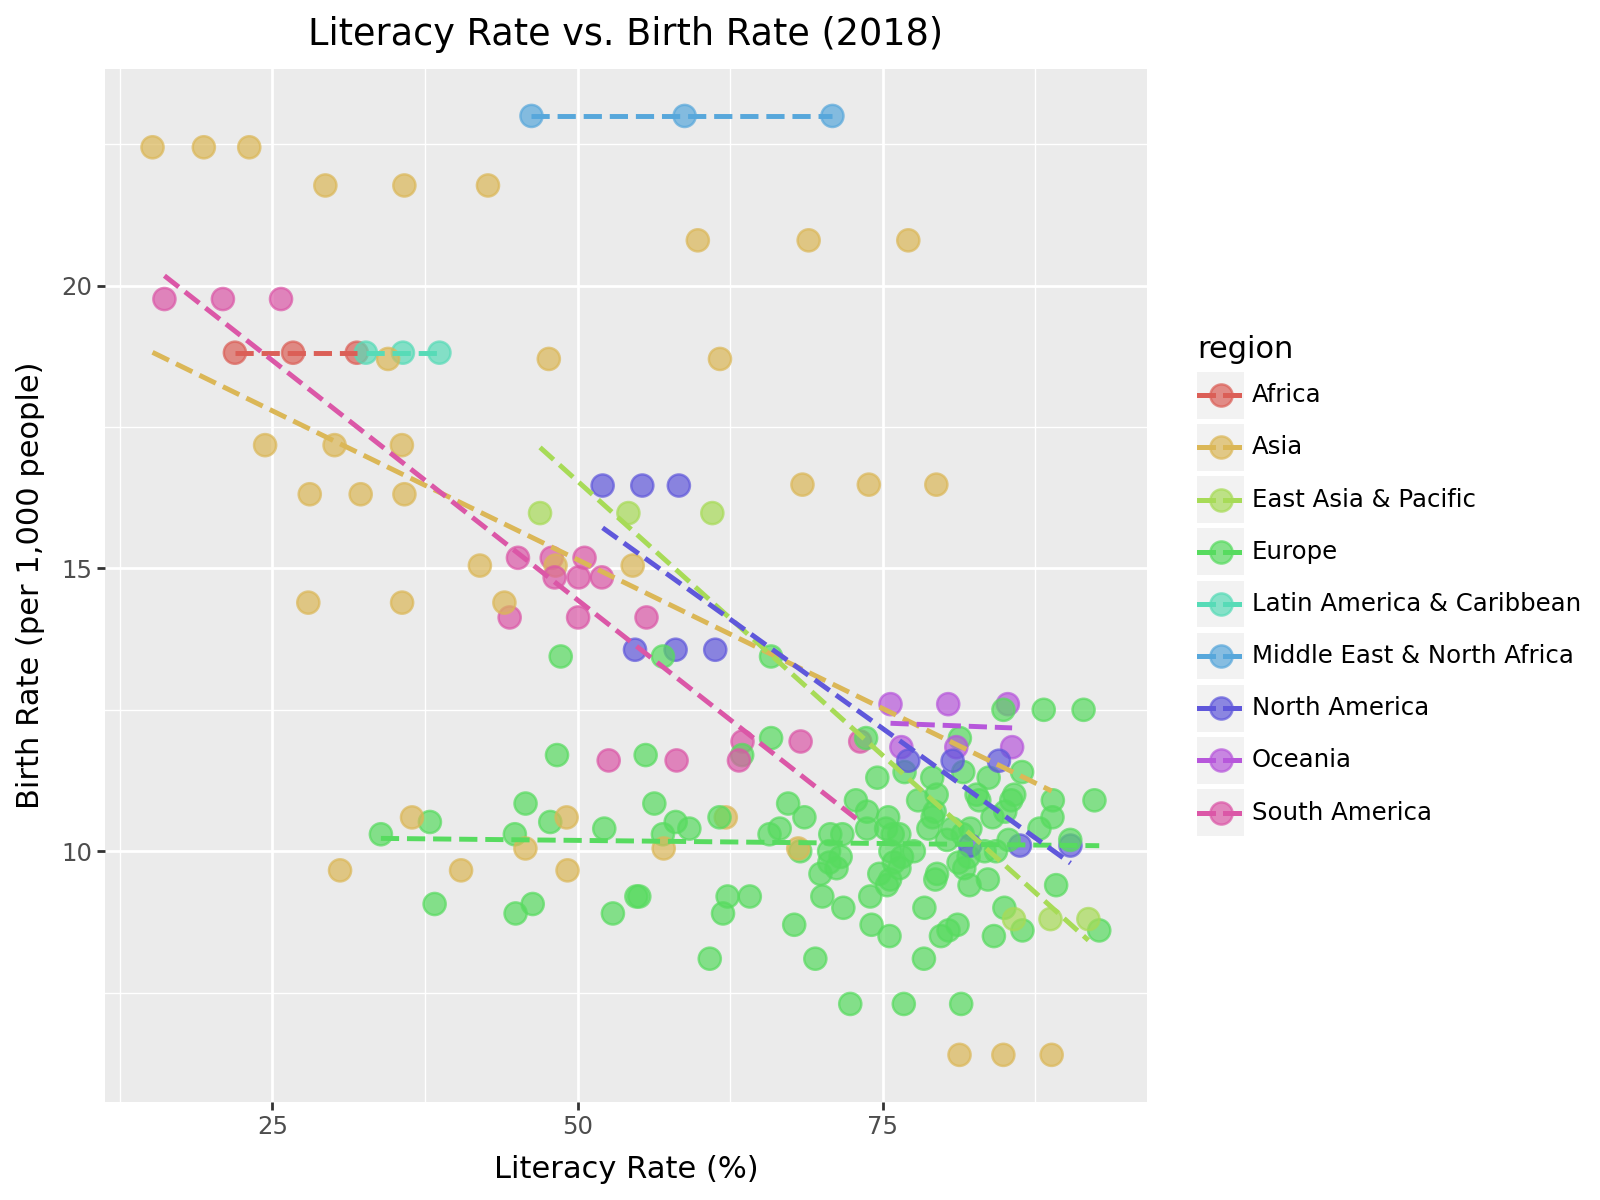

In [ ]:
# Filter 2018 data for both literacy and metadata
literacy_2018 = indicator_meta[indicator_meta['year'] == 2018]
metadata_2018 = metadata[metadata['year'] == 2018]

# Merge on 'country' to get literacy rate and birth rate together
scatter_data = pd.merge(
    literacy_2018,
    metadata_2018[['country', 'Birth rate, crude (per 1,000 people)']],
    on='country',
    how='inner'
)
scatter_data = scatter_data.rename(columns={'Birth rate, crude (per 1,000 people)_x': 'BirthRate'})
scatter_data.loc[scatter_data['country'] == 'Cuba', 'region'] = 'Latin America & Caribbean'
scatter_data.loc[scatter_data['country'] == 'Guatemala', 'region'] = 'Latin America & Caribbean'
scatter_data.loc[scatter_data['country'] == 'Honduras', 'region'] = 'Latin America & Caribbean'
scatter_data.loc[scatter_data['country'] == 'Jordan', 'region'] = 'Middle East & North Africa'
scatter_data.loc[scatter_data['country'] == 'Kyrgyzstan', 'region'] = 'Europe & Central Asia'
scatter_data.loc[scatter_data['country'] == 'Malaysia', 'region'] = 'East Asia & Pacific'
scatter_data.loc[scatter_data['country'] == 'Panama', 'region'] = 'Latin America & Caribbean'
scatter_data.loc[scatter_data['country'] == 'Singapore', 'region'] = 'East Asia & Pacific'

from plotnine import *

(
    ggplot(scatter_data, aes(x='Literacy Rate', y='BirthRate', color='region'))
    + geom_point(size=4, alpha=0.7)
    + geom_smooth(method='lm', se=False, linetype='dashed')
    + labs(
        title='Literacy Rate vs. Birth Rate (2018)',
        x='Literacy Rate (%)',
        y='Birth Rate (per 1,000 people)'
    )
    + theme(figure_size=(8, 6))
)

**Insight:**  
There is a strong inverse relationship between literacy and birth rate, underlining the demographic impact of education.

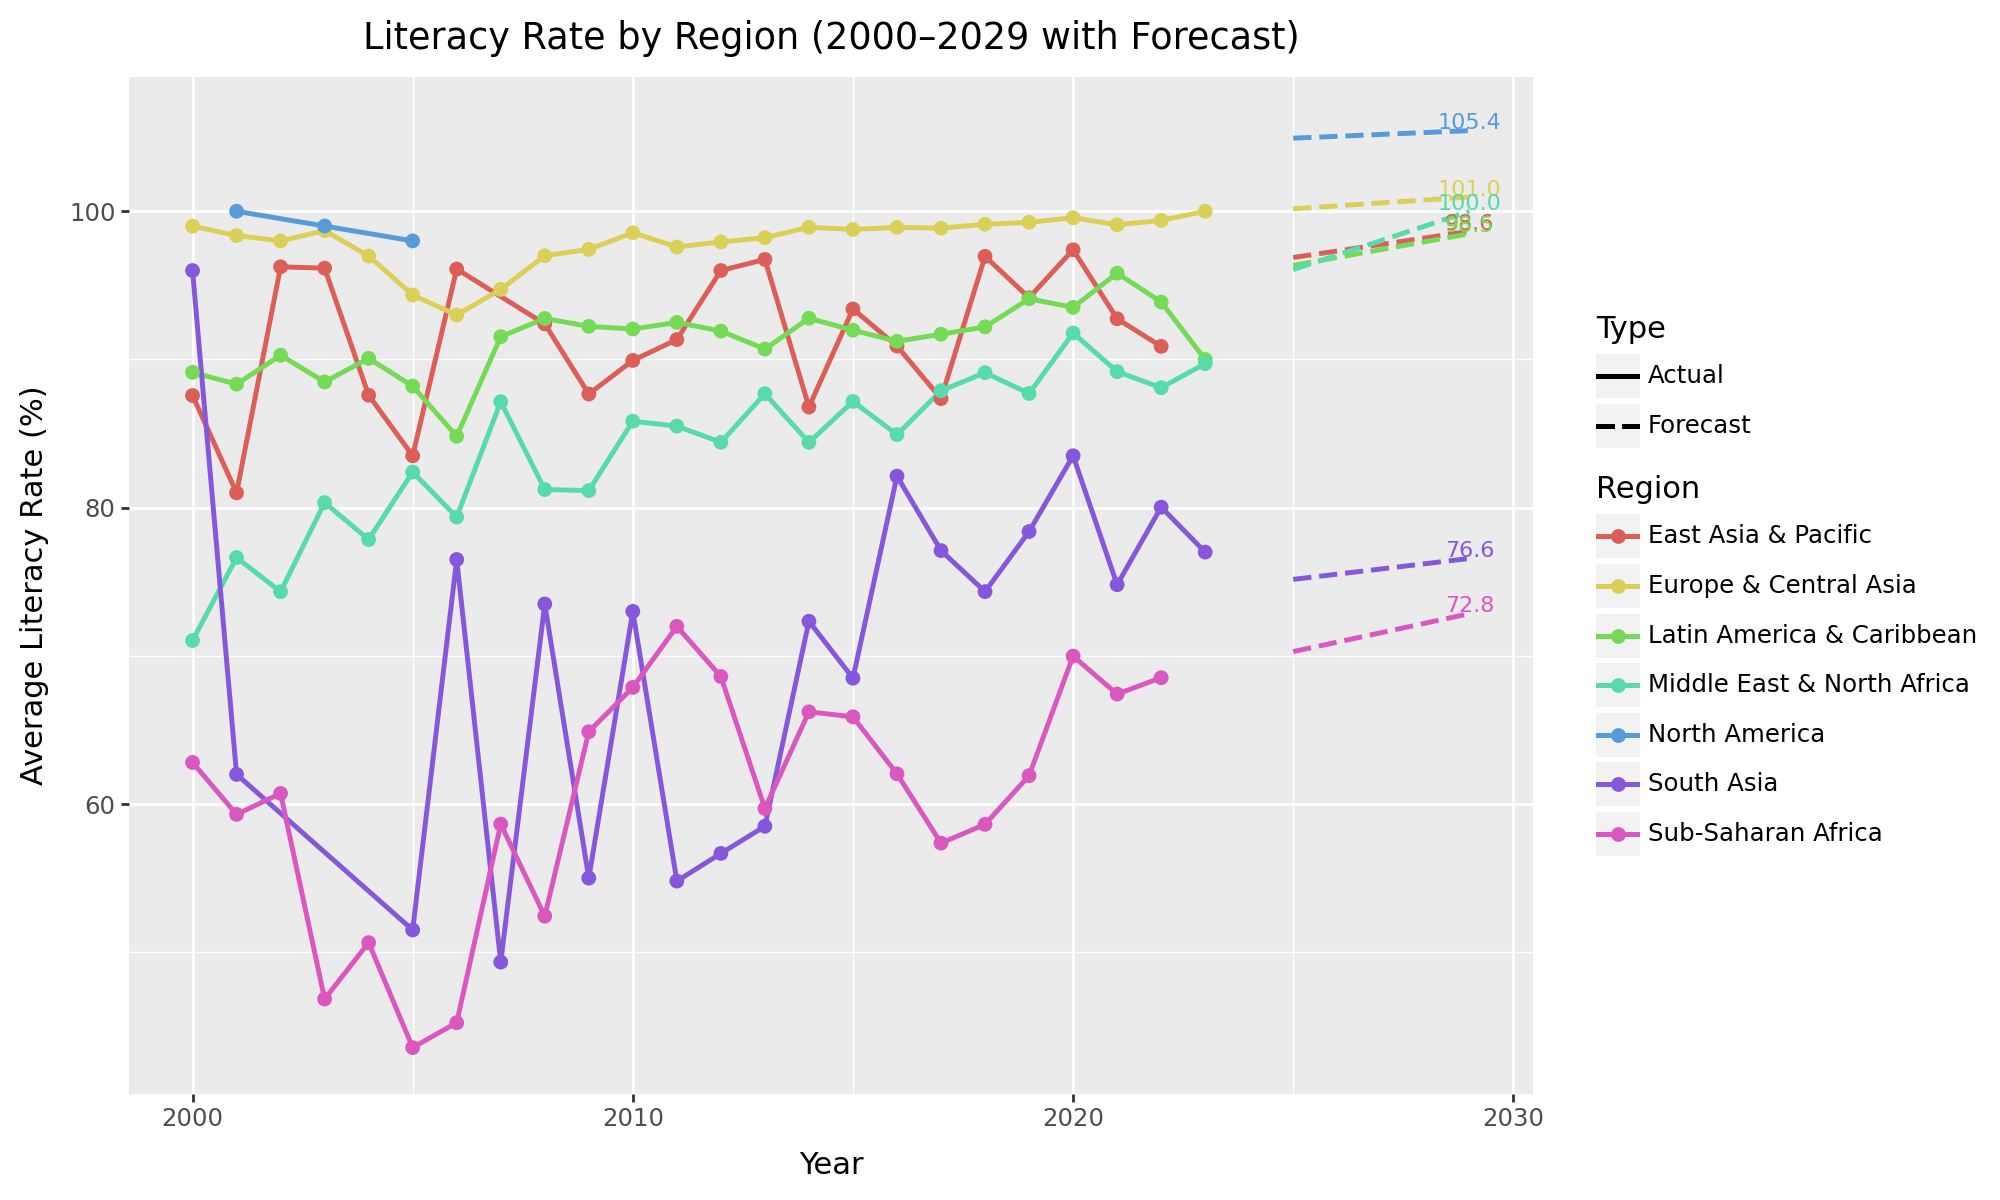

In [ ]:
literacydata = pd.read_csv('/LiteracyData_Quarto.csv')
literacydata = literacydata.rename(columns={
    'Entity': 'Country',
    'Code': 'CountryCode',
    'Year': 'Year',
    'Literacy rate': 'LiteracyRate',
    'Region': 'Region'
})
literacy_recent = literacydata[literacydata['Year'] >= 2000]
region_ts = (
    literacy_recent.groupby(['Region', 'Year'], as_index=False)
    .agg({'LiteracyRate': 'mean'})
)

from sklearn.linear_model import LinearRegression
import numpy as np

forecast_frames = []

# Loop over each region
for region in region_ts['Region'].unique():
    data = region_ts[region_ts['Region'] == region].copy()
    X = data['Year'].values.reshape(-1, 1)
    y = data['LiteracyRate'].values

    model = LinearRegression()
    model.fit(X, y)

    # Predict for next 5 years
    future_years = np.arange(2025, 2030)
    future_preds = model.predict(future_years.reshape(-1, 1))

    # Build forecast DataFrame
    forecast_df = pd.DataFrame({
        'Region': region,
        'Year': future_years,
        'LiteracyRate': future_preds
    })

    forecast_frames.append(forecast_df)

# Combine original and forecasted data
region_ts['Type'] = 'Actual'       # NEW LINE
forecast_all['Type'] = 'Forecast'  # NEW LINE
region_full = pd.concat([region_ts, forecast_all])
labels_2029 = region_full[(region_full['Year'] == 2029) & (region_full['Type'] == 'Forecast')].copy()
labels_2029['label'] = labels_2029['LiteracyRate'].round(1).astype(str)
from plotnine import *

(
    ggplot(region_full, aes(x='Year', y='LiteracyRate', color='Region', linetype='Type'))
    + geom_line(size=1)
    + geom_point(data=region_full[region_full['Type'] == 'Actual'], size=2)
    + geom_text(
        data=labels_2029,
        mapping=aes(label='label'),
        nudge_y=0.5,
        size=8,
        show_legend=False
    )
    + labs(
        title='Literacy Rate by Region (2000–2029 with Forecast)',
        x='Year',
        y='Average Literacy Rate (%)'
    )
    + scale_linetype_manual(values={'Actual': 'solid', 'Forecast': 'dashed'})
    + theme(figure_size=(10, 6))
)

**Insight:**  
Regional lines show that Europe & Central Asia lead in literacy, while Sub-Saharan Africa and South Asia continue to lag, though trends are positive.

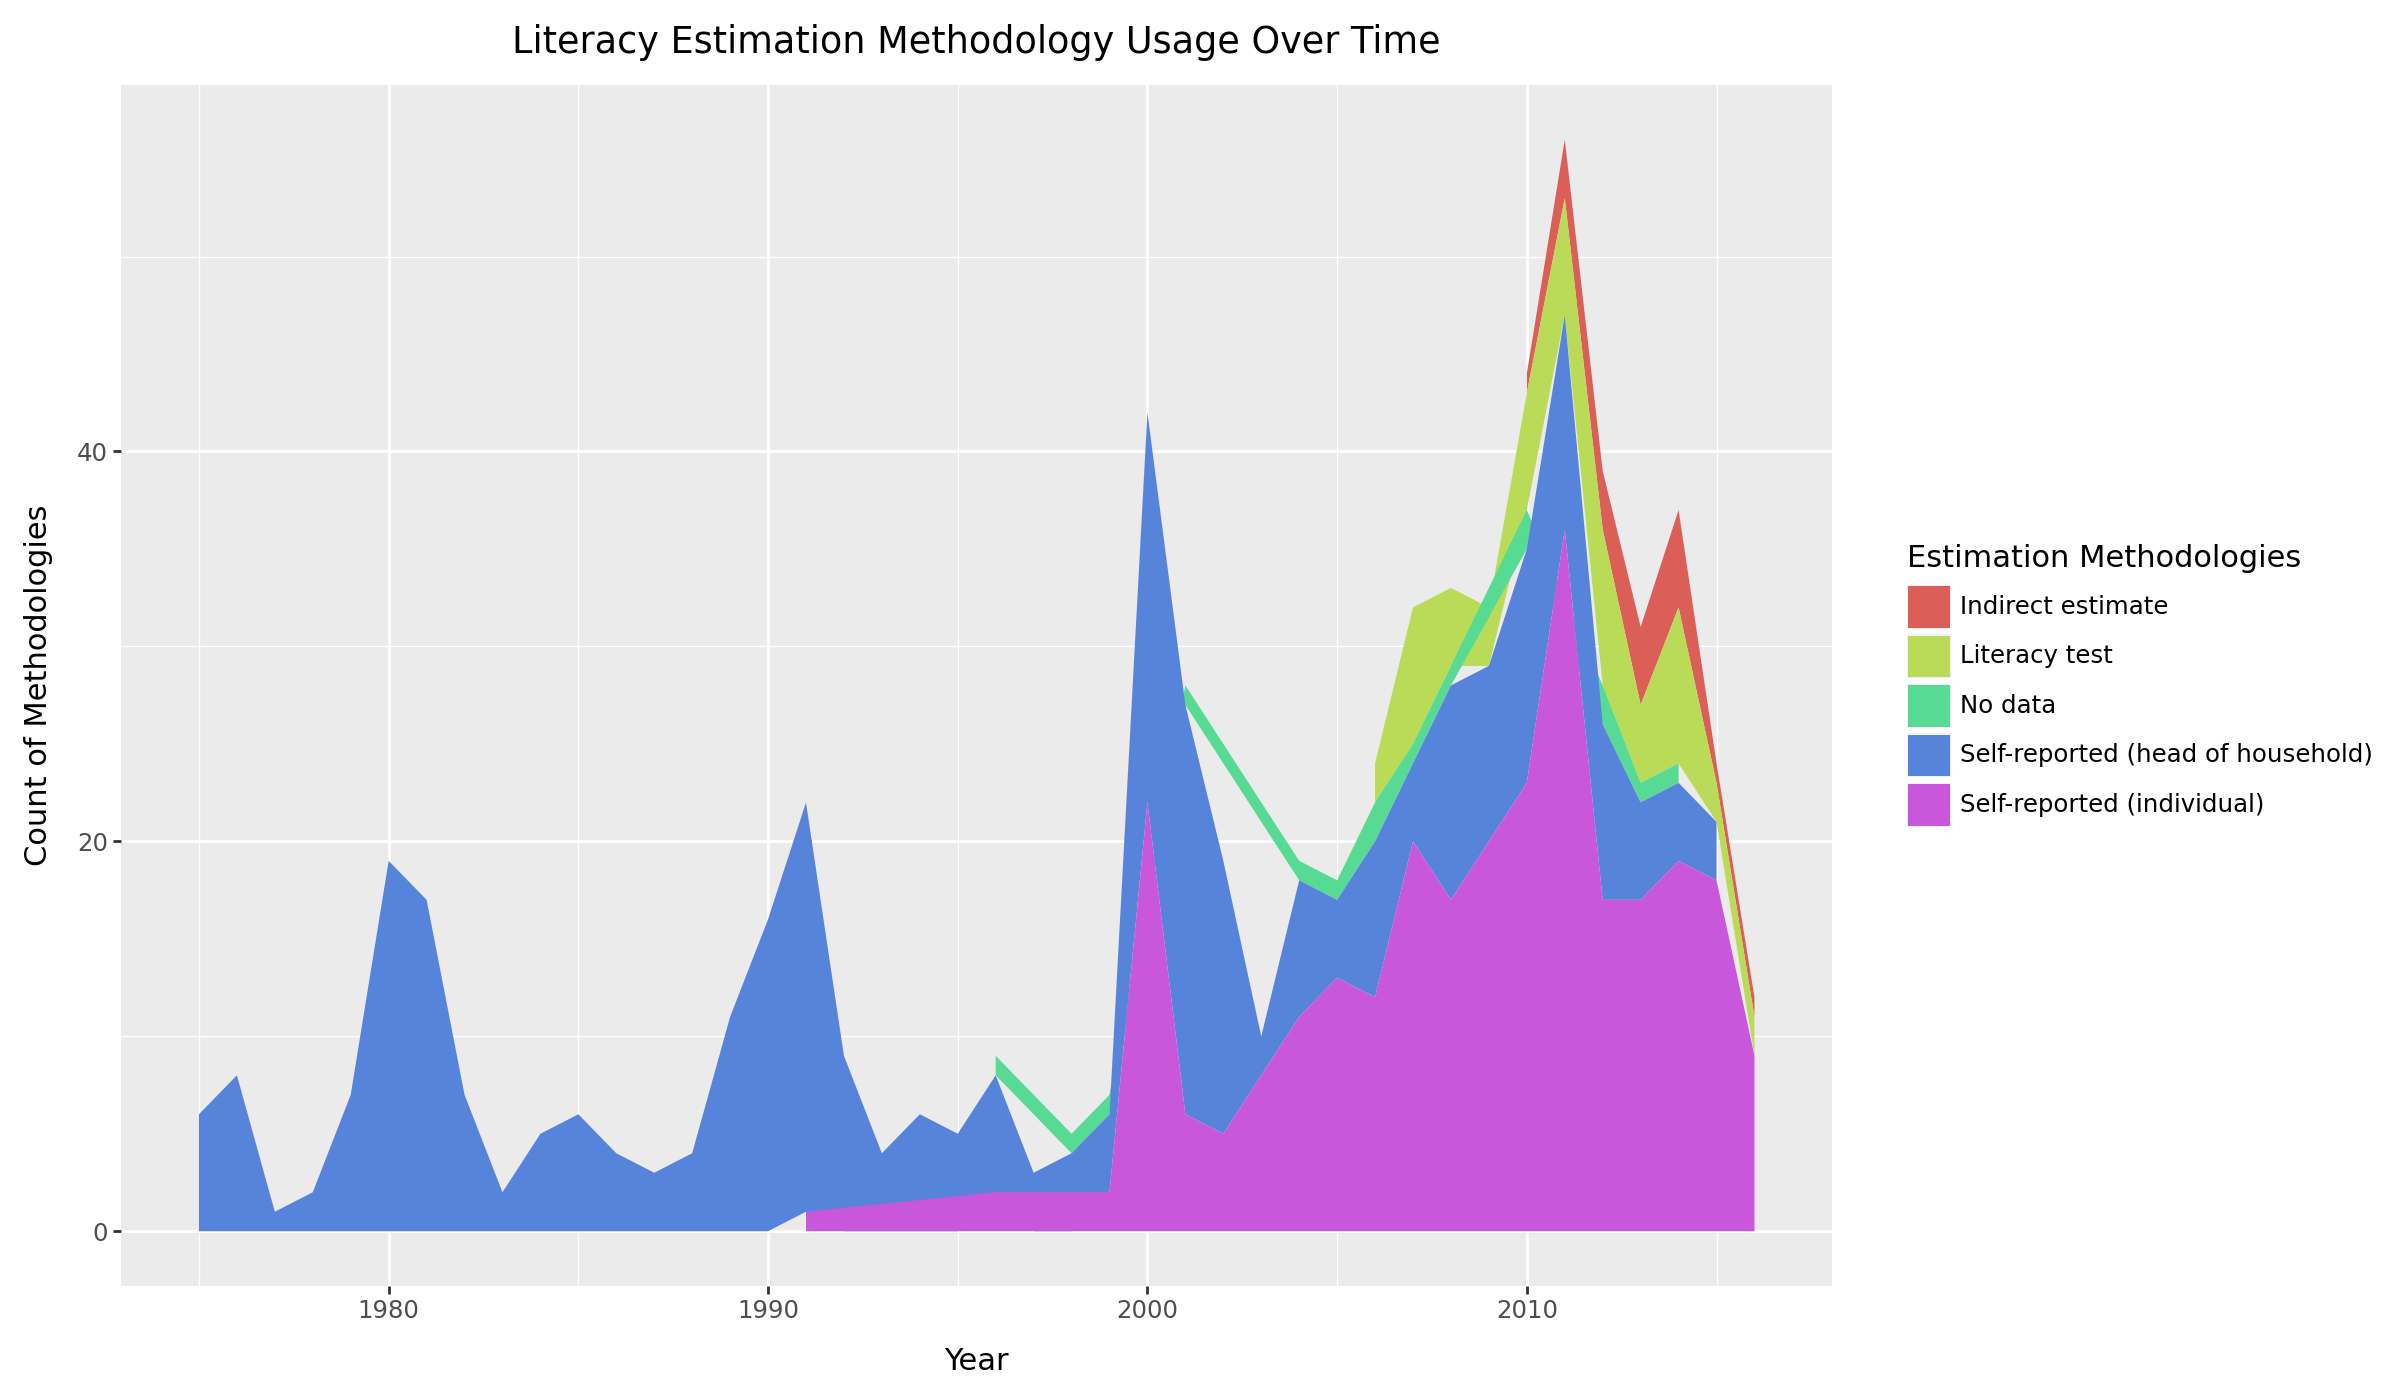

In [ ]:
estimate = estimate.rename(columns={'Methodologies used for measuring literacy (UIS (2017))': 'Method'})
method_counts = (
    estimate.groupby(['Year', 'Method'], as_index=False)
    .size()
    .rename(columns={'size': 'Count'})
)

(
    ggplot(method_counts, aes(x='Year', y='Count', fill='Method'))
    + geom_area(position='stack')
    + labs(
        title='Literacy Estimation Methodology Usage Over Time',
        x='Year',
        y='Count of Methodologies',
        fill='Estimation Methodologies'
    )
    + theme(figure_size=(12, 7))
)

**Insight:**  
Methodologies for literacy estimation are shifting toward more robust, direct assessments—though self-reports are still common.

Despite global progress in literacy, major regional and gender-based gaps remain. Methodological improvements have increased the reliability of statistics, but targeted action is still needed.

**Recommendations:**
- Expand standardized, direct literacy assessments to at least 90% of countries within three years.
- Halve the gender literacy gap in countries with >5% difference via measurable, targeted programs for girls.
- Prioritize literacy initiatives in Sub-Saharan Africa and South Asia, focusing on marginalized communities.
- Ensure all countries publicly report their literacy measurement methodology by 2025.